In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
inspector_gadget = inspect(engine)
tables = inspector_gadget.get_table_names()
for table in tables:
    print(table)

    columns = inspector_gadget.get_columns(table)
    for col in columns:
        print(col)

measurement
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
station
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoin

In [4]:
engine.execute('select * from measurement limit 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [5]:
engine.execute('select * from station limit 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [6]:
conn = engine.connect()
query = """
        select 
        * 
        from 
        measurement m 
        join station s on m.station = s.station
        where date like '%-06-%';
"""
df = pd.read_sql(query,conn)
df.head()

,id,station,date,prcp,tobs,id,station,name,latitude,longitude,elevation
0,134,USC00519397,2010-06-01,0.00,78.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,135,USC00519397,2010-06-02,0.01,76.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,136,USC00519397,2010-06-03,0.00,78.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,137,USC00519397,2010-06-04,0.00,76.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,138,USC00519397,2010-06-05,0.00,77.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [7]:
df.tobs.describe()


count    1700.000000
mean       74.944118
std         3.257417
min        64.000000
25%        73.000000
50%        75.000000
75%        77.000000
max        85.000000
Name: tobs, dtype: float64

In [31]:
conn = engine.connect()
query = """
        select 
        * 
        from 
        measurement m 
        join station s on m.station = s.station
        where date like '%-12-%';
"""
df1 = pd.read_sql(query,conn)
df1

,id,station,date,prcp,tobs,id,station,name,latitude,longitude,elevation
0,306,USC00519397,2010-12-01,0.04,76.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,307,USC00519397,2010-12-03,0.00,74.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,308,USC00519397,2010-12-04,0.00,74.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,309,USC00519397,2010-12-06,0.00,64.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,310,USC00519397,2010-12-07,0.00,64.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
...,...,...,...,...,...,...,...,...,...,...,...
1512,19324,USC00516128,2016-12-27,0.14,71.0,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
1513,19325,USC00516128,2016-12-28,0.14,71.0,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
1514,19326,USC00516128,2016-12-29,1.03,69.0,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
1515,19327,USC00516128,2016-12-30,2.37,65.0,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4


In [9]:
df1.tobs.describe()

count    1517.000000
mean       71.041529
std         3.745920
min        56.000000
25%        69.000000
50%        71.000000
75%        74.000000
max        83.000000
Name: tobs, dtype: float64

In [10]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [12]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement).filter(func.strftime("%m",Measurement.date)=='06').all()
june_temps[0:5]

In [13]:
#  3. Convert the June temperatures to a list.
tobs = [x.tobs for x in june_temps]
tobs[0:5]

[78.0, 76.0, 78.0, 76.0, 77.0]

In [14]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame()
june_df["June Temps"] = tobs
june_df.head()


,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [15]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()


,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


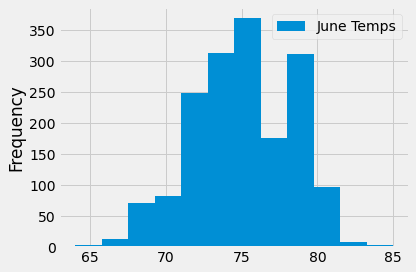

In [16]:
june_df.plot.hist(bins=12)
plt.tight_layout()

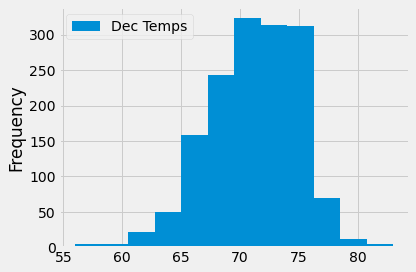

In [22]:
dec_df.plot.hist(bins=12)
plt.tight_layout()

In [23]:
prcp = [x.prcp for x in june_temps]
prcp[0:5]

[0.0, 0.01, 0.0, 0.0, 0.0]

In [24]:
june_prcp_df = pd.DataFrame()
june_prcp_df["June prcp"] = prcp
june_prcp_df.head()


,June prcp
0,0.00
1,0.01
2,0.00
3,0.00
4,0.00


In [25]:
june_prcp_df.describe()

,June prcp
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


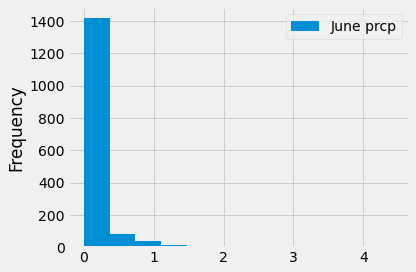

In [26]:
june_prcp_df.plot.hist(bins=12)
plt.tight_layout()

In [27]:
prcp1 = [x.prcp for x in dec_temps]
prcp1[0:5]

[0.04, 0.0, 0.0, 0.0, 0.0]

In [28]:
dec_prcp_df = pd.DataFrame()
dec_prcp_df["Dec prcp"] = prcp1
dec_prcp_df.head()


,Dec prcp
0,0.04
1,0.00
2,0.00
3,0.00
4,0.00


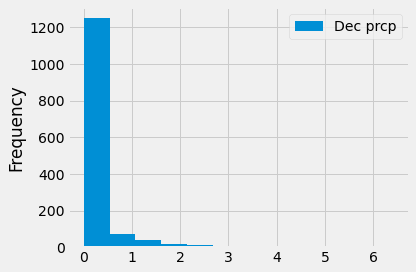

In [29]:
dec_prcp_df.plot.hist(bins=12)
plt.tight_layout()

In [30]:
dec_prcp_df.describe()

,Dec prcp
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


## D2: Determine the Summary Statistics for December

In [18]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement).filter(func.strftime("%m",Measurement.date)=='12').all()
dec_temps[0:5]

In [19]:
# 7. Convert the December temperatures to a list.
tobs1 = [x.tobs for x in dec_temps]
tobs1[0:5]

[76.0, 74.0, 74.0, 64.0, 64.0]

In [20]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame()
dec_df['Dec Temps'] = tobs1
dec_df.head()

,Dec Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


In [21]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000
